# Collecting the plots

In [10]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
GL_00 = np.loadtxt('outputs/Energy_profile_00_GL.txt')
PZ_00 = np.loadtxt('outputs/Energy_profile_00_PZ.txt')
HF = np.loadtxt('outputs/Energy_profile_HF.txt')

In [16]:
GL_00 = pd.read_csv('outputs/Energy_profile_00_GL.txt',sep='\s+',header=None)
GL_00 = pd.DataFrame(GL_00)
PZ_00 = pd.read_csv('outputs/Energy_profile_00_PZ.txt',sep='\s+',header=None)
PZ_00 = pd.DataFrame(PZ_00)

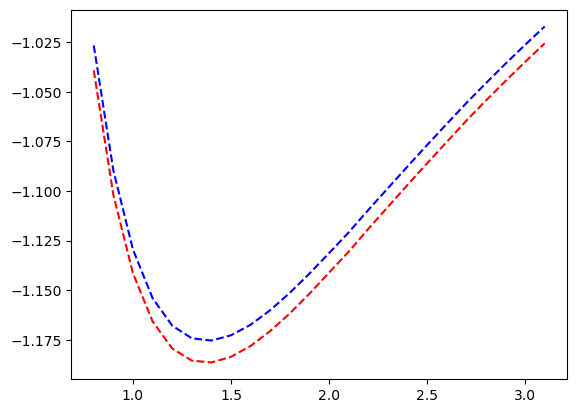

In [18]:
plt.plot(GL_00[0], GL_00[1],'r--')
plt.plot(PZ_00[0], PZ_00[1],'b--')